In [1]:
%load_ext notexbook

%texify

# Nearest Neighbours

In the first chapters we were using linear regression which is a supervised regression technique. 

We're going to carry on with supervised techniques but look instead at how we can classify or categorise data using an algorithm called *K-nearest neighbours*.

**Note**: The K-Nearest Neighbour algorithm (`KNN`) is the very same algorithm we implemented in our Python programming class.

When you ask for a prediction from k-NN for a data point $x$, the algorithm looks at all the training data that was passed in and finds the $k$ nearest (e.g. the `5-nearest`) data points. 

The label of $x$ will then be based on whichever label was found most frequently within the $k$ neighbours.

<img src="images/knn.gif" style="box-shadow: none;">

Once again, let's create some dummy data while we explore the concept. 

We use the `make_moons` function which is one of the _data generation_ functions `sklearn` provides:

<AxesSubplot:xlabel='x1', ylabel='x2'>

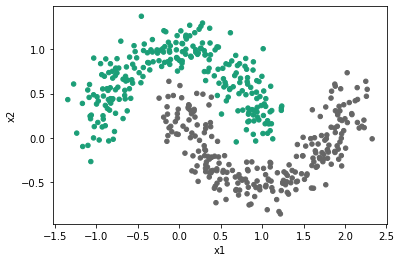

In [2]:
import pandas as pd
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.15, random_state=42)
X = pd.DataFrame(X, columns=["x1", "x2"])

X.plot.scatter("x1", "x2", c=y, colormap="Dark2", colorbar=False)

As ever, we need to split our data into a training data set and a test data set:

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Now we have our data and it's all in the correct format ($X$ is a 2D table of data and $y$ is a single column of labels), we can go ahead and use our model.

As usual it works by importing the model, [`KNeighborsClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html), making an instance of it (setting the hyperparameters) and then fitting it by passing it $X$ and $y$ for the training data set.

The most important hyperparameter for k-NN is $k$, or the number of neighbours. 

The model defaults to 5 but you can set it to any integer you wish.

In [4]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsClassifier()

At this point, our `model` is ready to use. I'll point out one important difference between k-NN and other algorithms and that is how it stores the information you have given it.

**NOTE**: `KNN` is a *non-generalising learning algorithm* (also referred to as *instance-based learning*). 

It doesn't simplify down the training data we pass in, it actually stores *all* of it internally. 

Thinking about it, this makes sense as when we ask it to make a prediction it needs to actually go and find the data points that are near the prediction site. 

This means that if we train a model on more data, the model becomes more heavyweight (i.e. may use more memory) and will likely become slower (as it needs to check more points to find the neighbours).

In general, this will not cause a problem but it's something that you should be aware of.

We can use our model in the same way as in the past to, for example, check the performance against the test data set:

In [5]:
model.score(X_test, y_test)

1.0

Hmm, looks like a perfect score. Is that believable or do you think we've done something wrong?

### Decision Boundary

Let's take a look at the distribution of predictions compared to the input data.

Let's now create a function to show the decision boundary of a general ML model. 

Don't worry about understanding the `plot_decision_boundary` function, just know that you need to pass it your trained model and the $X$ and $y$ data:

In [6]:
%%writefile plot.py

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
    
def plot_decision_boundary(model, X, y, resolution=100, ax=None):

    if X.shape[1] != 2:
        raise ValueError(f"X must have exactly two features to plot, you passed X.shape={X.shape}")
    if not isinstance(X, pd.DataFrame):
        X = pd.DataFrame(X)
    x1 = X.iloc[:,0]
    x2 = X.iloc[:,1]
    x1_range = np.linspace(x1.min()*1.1 - x1.max()*0.1, x1.max()*1.1 - x1.min()*0.1, resolution)
    x2_range = np.linspace(x2.min()*1.1 - x2.max()*0.1, x2.max()*1.1 - x2.min()*0.1, resolution)
    grid_x1_values, grid_x2_values = np.meshgrid(x1_range, x2_range)
    x_prime = np.column_stack((grid_x1_values.ravel(), grid_x2_values.ravel()))
    x_prime = pd.DataFrame(x_prime, columns=X.columns)
    y_hat = model.predict(x_prime).reshape(grid_x1_values.shape)

    if ax is None:
        fig, ax = plt.subplots()
        
    ax.pcolormesh(grid_x1_values, grid_x2_values, y_hat, cmap="Pastel2", alpha=1.0, shading="auto")
    X.plot.scatter(0, 1, c=y, colormap="Dark2", colorbar=False, alpha=0.8, ax=ax)

Overwriting plot.py


We can then import this function and use it to plot our data:

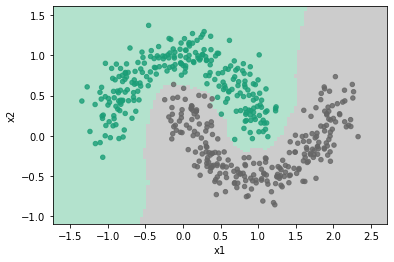

In [7]:
from plot import plot_decision_boundary

plot_decision_boundary(model, X, y)

Here we can see that all of the green points are sitting in the green background area and the grey points are all in their area. 

In this case, it makes sense that it's got a perfect score since the data is not overlapping much.

# Multi-Layer Perceptron

<img src="images/multi-layers-1.png" class="maxw60" />

_(Source: Python Machine Learning, S. Raschka)_

The figure shows the concept of an **MLP** consisting of three layers:
one _input_ layer, one _hidden_ layer, and one _output_ layer.

The units in the hidden layer are fully connected to the input layer,
and the output layer is fully connected to the hidden layer, respectively.

If such a network has **more than one hidden layer**,
we also call it a **deep artificial neural network**.


### The Learning Process of a Neural Network

<img src="images/learning_process.png" class="maxw60" />

<span class="fn"><i>Source:</i> [1] - _Deep Learning with PyTorch_ </span>

#### Forward Propagation

<img src="images/fwd_step_net.png" class="maxw60" />

_(Source: Python Machine Learning, S. Raschka)_

* Starting at the input layer, we forward propagate the patterns of the training
data through the network to generate an output.

* Based on the network's output, we calculate the error that we want to minimize
using a cost function that we will describe later.

* We backpropagate the error, find its derivative with respect to each weight
in the network, and update the model.

##### Sigmoid Activation

<img src="images/logistic_function.png" class="maxw60" />

_(Source: Python Machine Learning, S. Raschka)_

#### Backward Propagation

The weights of each neuron are learned by **gradient descent**,
where each neuron's error is derived with respect to it's weight.

<img src="images/bkwd_step_net.png" class="maxw60" />

_(Source: Python Machine Learning, S. Raschka)_

Optimization is done for each layer with respect to the previous layer
in a technique known as **BackPropagation**.

In [8]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(activation="logistic", hidden_layer_sizes=(100, 10, ))

mlp.fit(X_train, y_train)

/Users/valerio/anaconda3/envs/webvalley/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=(100, 10))

In [9]:
mlp.score(X_test, y_test)

0.864

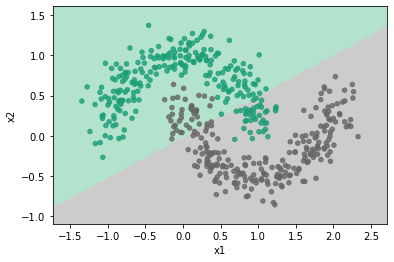

In [10]:
plot_decision_boundary(mlp, X, y)

### Exercise

Rerun the experiment with the `MLPClassifier` by changing one **hyperparameter** and using the `relu` (default) activation function instead of the `logistic`. 
What happens to the decision boundary ?

---

## Introducing `PyTorch`

One of the most popular package in the Python ecosystem to build Neural Networks is `PyTorch` (or simply `torch`).

We will see a simple examplar implementation of the same `MLP` model using the main components of `torch`

In [11]:
import torch
import numpy as np

In [12]:
X_train, X_test = torch.from_numpy(X_train.to_numpy().astype(np.float32)), torch.from_numpy(X_test.to_numpy().astype(np.float32))

In [13]:
y_train, y_test = torch.from_numpy(y_train), torch.from_numpy(y_test)

In [14]:
X_train.shape, y_train.shape

(torch.Size([375, 2]), torch.Size([375]))

In [15]:
X_train.dtype

torch.float32

In [16]:
np.unique(y_train).shape

(2,)

In [17]:
N, D_in, H1, H2, D_out = X_train.shape[0], X_train.shape[1], 100, 10, 2

# Use the nn package to define our model as a sequence of layers. nn.Sequential
# is a Module which contains other Modules, and applies them in sequence to
# produce its output. Each Linear Module computes output from input using a
# linear function, and holds internal Tensors for its weight and bias.
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H1), # xW+b
    torch.nn.ReLU(),
    torch.nn.Linear(H1, H2), # xW+b
    torch.nn.ReLU(),
    torch.nn.Linear(H2, D_out),
)

In [18]:
# The nn package also contains definitions of popular loss functions; in this
# case we will use BCELossWithLogits, which combines a Sigmoid layer and 
# the BCELoss in one single class. 
loss_fn = torch.nn.CrossEntropyLoss() #torch.nn.BCEWithLogitsLoss()

In [19]:
# Use the optim package to define an Optimizer that will update the weights of
# the model for us. Here we will use Adam; the optim package contains many other
# optimization algoriths. The first argument to the Adam constructor tells the
# optimizer which Tensors it should update.
learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [20]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [21]:
for t in range(1000):
    # Forward pass: compute predicted y by passing x to the model.
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    if t % 50 == 0:
        print(t, loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

0 0.703947901725769
50 0.6757521629333496
100 0.6531845927238464
150 0.6295117735862732
200 0.6045925617218018
250 0.5734097361564636
300 0.5464199781417847
350 0.5257594585418701
400 0.5090778470039368
450 0.49518728256225586
500 0.48345011472702026
550 0.47317439317703247
600 0.46387895941734314
650 0.45531779527664185
700 0.4472821354866028
750 0.4396270215511322
800 0.43220365047454834
850 0.4249328076839447
900 0.41781002283096313
950 0.4107862412929535


In [22]:
from sklearn.metrics import accuracy_score

with torch.no_grad():
    output = model(X_test)
    _, y_pred = torch.max(output, 1)
    y_pred = y_pred.detach().numpy()
    print(accuracy_score(y_test, y_pred))

0.872
